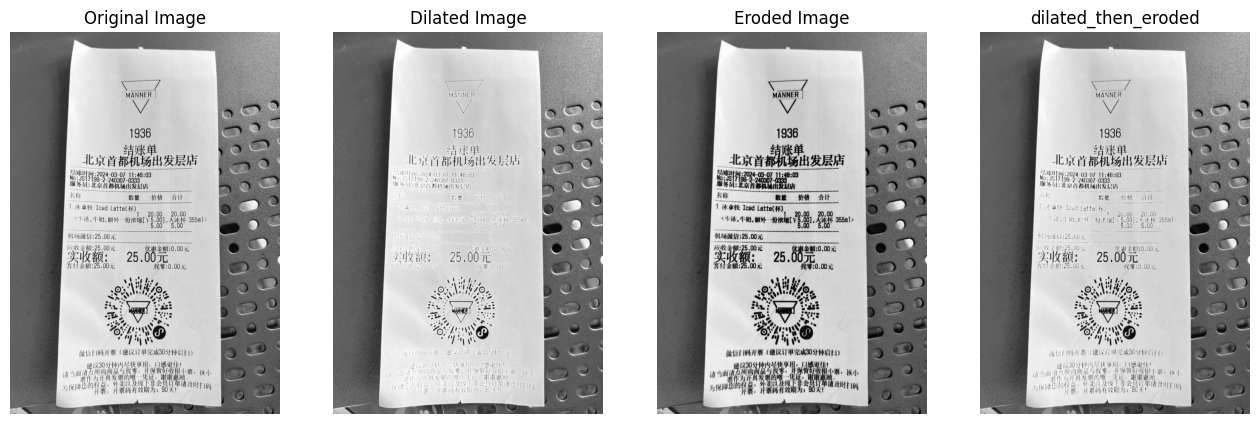

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기 (그레이스케일로 읽기)
image = cv2.imread('/data/ephemeral/home/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000112_page0001.jpg', cv2.IMREAD_GRAYSCALE)

# 팽창 및 침식 커널 크기 설정
dilation_kernel_size = 3
erosion_kernel_size = 3
dilation_kernel = np.ones((dilation_kernel_size, dilation_kernel_size), np.uint8)
erosion_kernel = np.ones((erosion_kernel_size, erosion_kernel_size), np.uint8)

# 팽창 및 침식 커널 크기 설정
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# 팽창 적용
dilated_image = cv2.dilate(image, dilation_kernel)

# 침식 적용
eroded_image = cv2.erode(image, erosion_kernel)

# 팽창 후 침식 (열림 연산처럼 연속 적용)
dilated_then_eroded = cv2.erode(dilated_image, kernel)

# 결과 시각화
plt.figure(figsize=(16, 16))

# 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 팽창 이미지
plt.subplot(1, 4, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# 침식 이미지
plt.subplot(1, 4, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# 침식 이미지
plt.subplot(1, 4, 4)
plt.imshow(dilated_then_eroded, cmap='gray')
plt.title('dilated_then_eroded')
plt.axis('off')

plt.show()


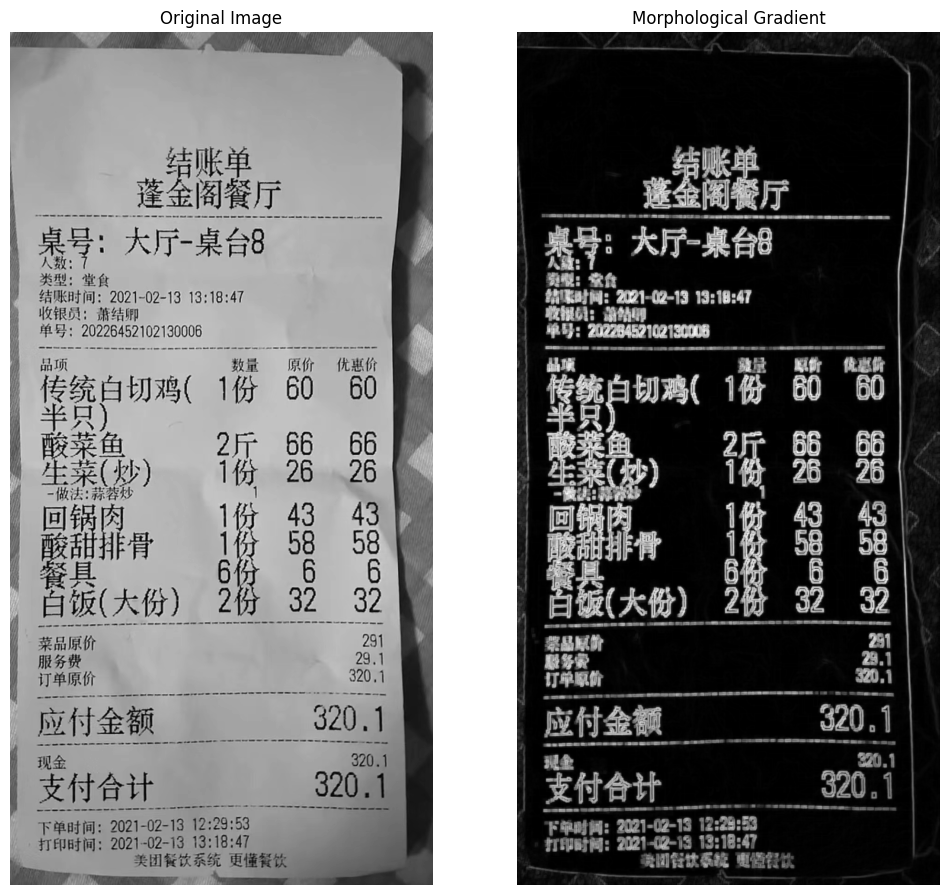

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기 (그레이스케일로 읽기)
image = cv2.imread('/data/ephemeral/home/Jeongseon/data/chinese_receipt/img/train/extractor.zh.in_house.appen2_001074_page0001.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 크기 설정
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Morphological Gradient 적용 (팽창 - 침식)
morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# 결과 시각화
plt.figure(figsize=(12, 12))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Morphological Gradient 이미지
plt.subplot(1, 2, 2)
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morphological Gradient')
plt.axis('off')

plt.show()


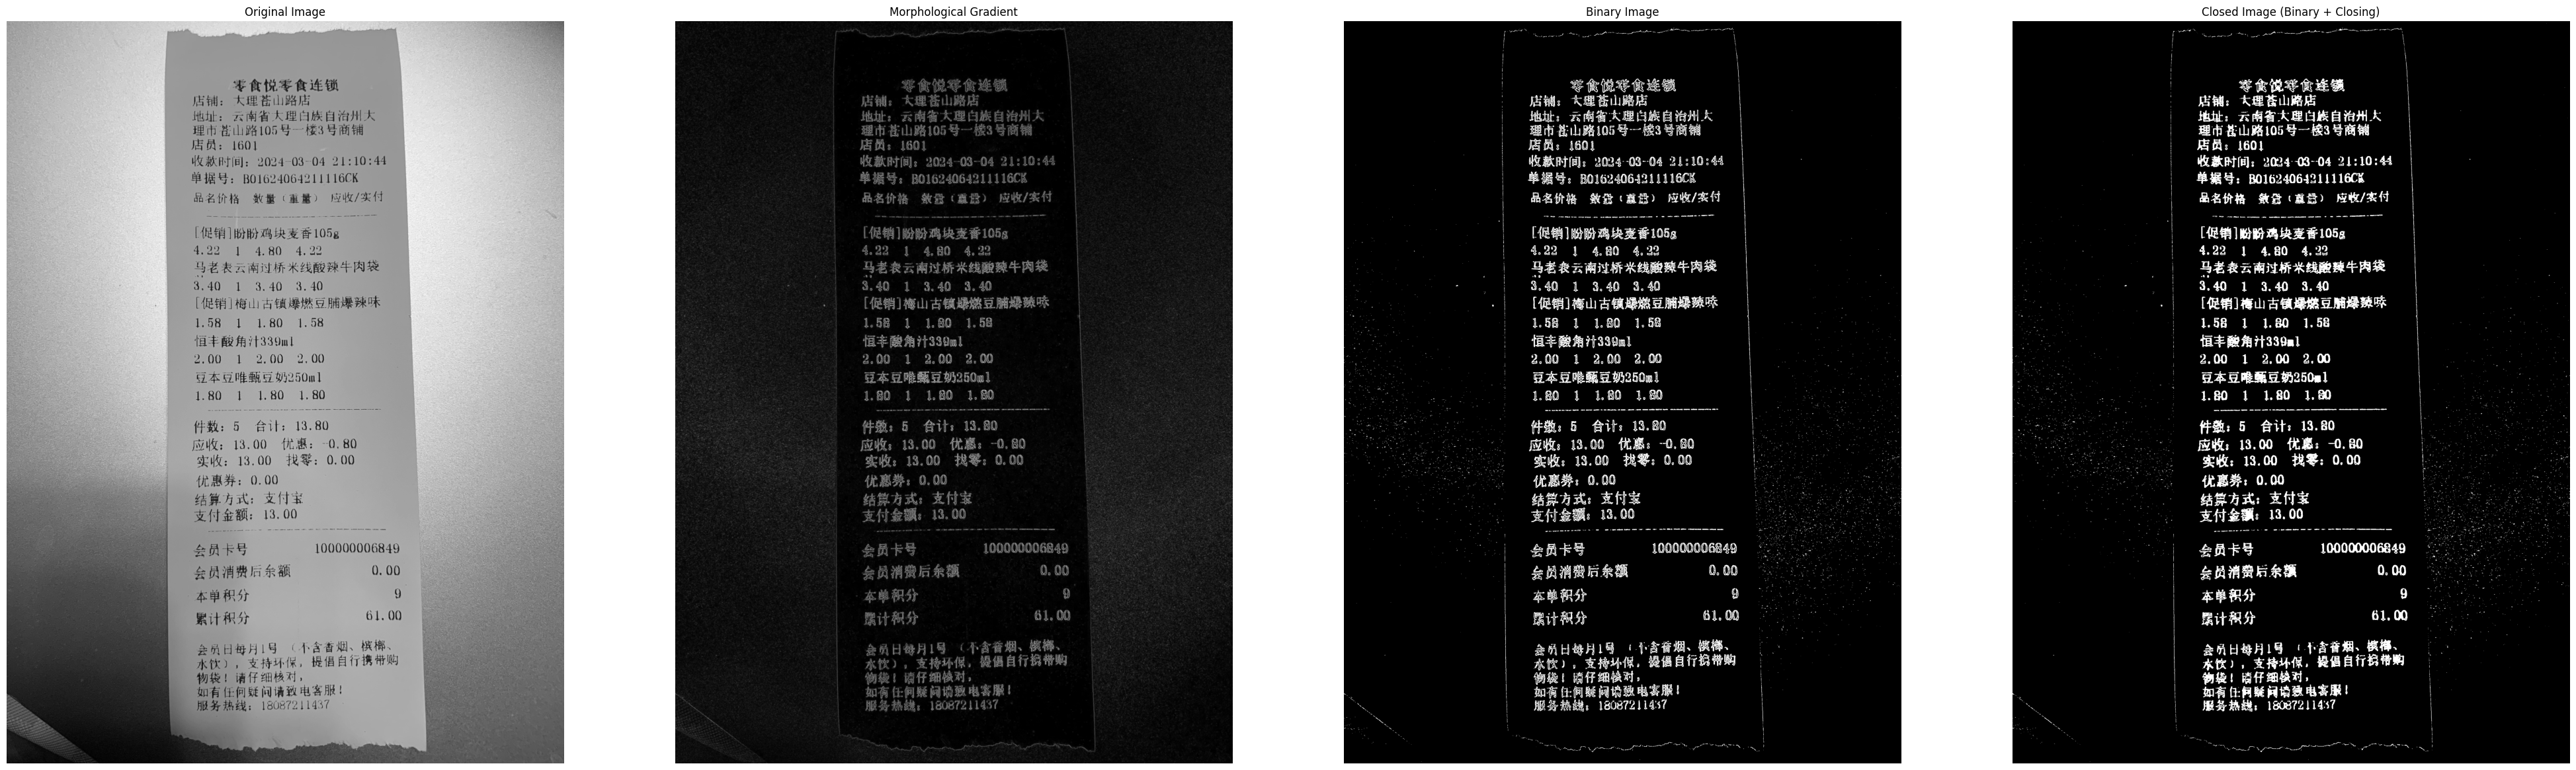

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기 (그레이스케일로 읽기)
image = cv2.imread('/data/ephemeral/home/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000104_page0001.jpg', cv2.IMREAD_GRAYSCALE)

# 커널 크기 설정
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# 1. Morphological Gradient 적용
morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# 2. 이진화 적용 (Morphological Gradient 결과에 대해)
# 2. Otsu's Thresholding을 사용한 이진화 적용
_, binary_image = cv2.threshold(morph_gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 3. 닫힘 연산 (Closing) 적용
#closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, rect_kernel)

# 결과 시각화
plt.figure(figsize=(50, 50))

# 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Morphological Gradient 이미지
plt.subplot(1, 4, 2)
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morphological Gradient')
plt.axis('off')

# 이진화 이미지
plt.subplot(1, 4, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# 닫힘 연산 이미지
plt.subplot(1, 4, 4)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image (Binary + Closing)')
plt.axis('off')

plt.show()


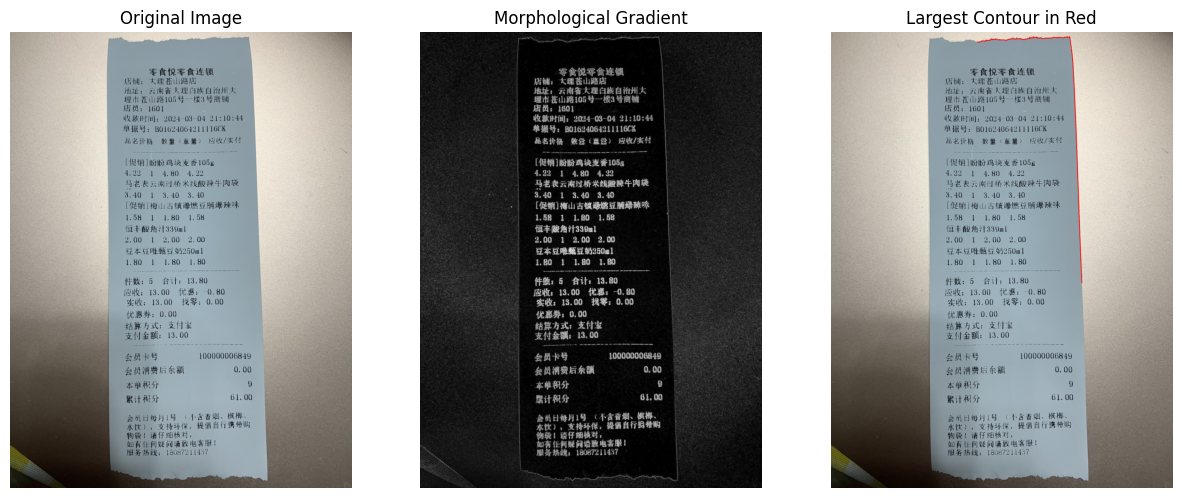

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = '/data/ephemeral/home/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000104_page0001.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Morphological Gradient 적용
kernel = np.ones((5, 5), np.uint8)  # 커널 크기는 상황에 따라 조정 가능
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)

# 이진화 적용
_, binary_gradient = cv2.threshold(gradient, 50, 255, cv2.THRESH_BINARY)

# 윤곽선 검출
contours, _ = cv2.findContours(binary_gradient, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 윤곽선 선택
contours = sorted(contours, key=cv2.contourArea, reverse=True)
receipt_contour = contours[0] if contours else None

# 원본 이미지에 가장 큰 윤곽선을 빨간색으로 표시
image_with_contour = image.copy()
if receipt_contour is not None:
    cv2.drawContours(image_with_contour, [receipt_contour], -1, (0, 0, 255), thickness=2)

# 단계별 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gradient, cmap="gray")
axes[1].set_title("Morphological Gradient")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(image_with_contour, cv2.COLOR_BGR2RGB))
axes[2].set_title("Largest Contour in Red")
axes[2].axis("off")

plt.show()


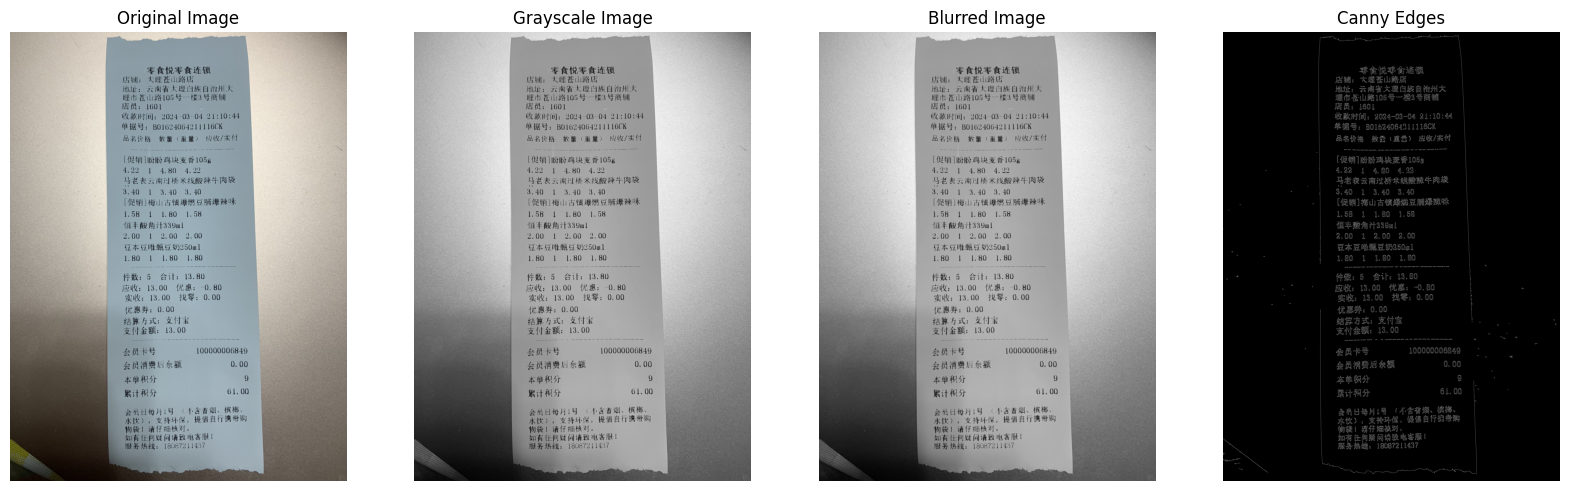

In [12]:
# Load the image again for clarity in processing
image = cv2.imread('/data/ephemeral/home/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000104_page0001.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Visualization of each step
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gray, cmap="gray")
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(blurred, cmap="gray")
axes[2].set_title("Blurred Image")
axes[2].axis("off")

axes[3].imshow(edges, cmap="gray")
axes[3].set_title("Canny Edges")
axes[3].axis("off")

plt.show()
